## Домашнее задание 4, Ускорение и оптимальные методы
### Deadline -  11.10.2024    

## Основная часть

Рассмотрим задачу минимизации эмпирического риска:

\begin{equation}
\min_{x \in \mathbb{R}^d} \left[ f(x) = \frac{1}{n} \sum\limits_{i=1}^n \ell_x(a_i, b_i) + \frac{\lambda}{2} \| x \|^2_2\right],
\end{equation}

где:
- $\ell_x(a_i, b_i)$ — функция потерь (cross-entropy loss),
- $x$ — вектор параметров модели,
- $\{a_i, b_i\}_{i=1}^n$ — выборка данных,
- $\lambda > 0$ — параметр регуляризации.

Функция потерь для каждого объекта $i$ записывается как:

\begin{equation}
\ell_x(a_i, b_i) = -b_i \ln(p(x^Ta_i)) - (1 - b_i) \ln(1 - p(x^Ta_i)),
\end{equation}

где $p(x^Ta_i)$ — это вероятность, вычисляемая с помощью логистической функции в комбинации с линейной моделью:

\begin{equation}
p(x^Ta_i) = \frac{1}{1 + \exp(-x^T a_i)}.
\end{equation}




Подробнее почитать можно [здесь](https://habr.com/ru/articles/485872/) и [здесь](https://habr.com/ru/articles/803397/). Разобраться глубже можно [вот здесь](https://web.stanford.edu/~jurafsky/slp3/5.pdf), например.

__Задача 1. (всего 4 балла)__ Проведем подготовительную работу.


__а). (2 балла)__ Исследуем задачу на сильную выпуклость и липшицевость.

Докажите, что градиент нашей функции потерь равен:

\begin{equation}
\nabla f(x) = \frac{1}{n} \sum_{i=1}^n (p(x^Ta_i) - b_i) a_i + \lambda x
\end{equation}


__Ваше решение__

$df(x) = d \left( \frac{1}{n} \sum\limits_{i=1}^n \ell_x(a_i, b_i) + \frac{\lambda}{2} \|x\|^2_2 \right) = 
\frac{1}{n} \sum\limits_{i=1}^n d \left( -b_i \ln(p(x^Ta_i)) - (1 - b_i) \ln(1 - p(x^Ta_i))\right)  + \frac{\lambda}{2} \langle x, x \rangle = 
\frac{1}{n} \sum\limits_{i=1}^n \left(-b_i \frac {d(p(x^T a_i))}{p(x^T a_i)} + (1 - b_i) \frac {d(p(x^T a_i))} {1 - p(x^T a_i)} \right) + \lambda \langle x, dx \rangle = 
\frac{1}{n} \sum\limits_{i=1}^n \left( \frac{(p(x^Ta_i) - b_i)d(p(x^Ta_i))}{p(x^Ta_i)(1 - p(x^Ta_i))} + \lambda \langle x, dx \rangle \right) = 
\frac{1}{n} \sum\limits_{i=1}^n \left( \frac{(p(x^Ta_i) - b_i)}{p(x^Ta_i)(1 - p(x^Ta_i))} \cdot \left( \frac{1}{1 + \exp(-x^T a_i)} \right)^2 \cdot \exp(-x^T a_i) \cdot d(x^T a_i) \right) + \lambda \langle x, dx \rangle  = 
\frac{1}{n} \sum\limits_{i=1}^n \left( \frac{(p(x^Ta_i) - b_i)}{p(x^Ta_i)(1 - p(x^Ta_i))} \cdot \left(  \frac{1}{1 + \exp(-x^T a_i)}  - \left( \frac{1}{1 + \exp(-x^T a_i)} \right)^2 \right) \cdot d \langle a_i, x \rangle \right)  + \lambda \langle x, dx \rangle = 
\frac{1}{n} \sum\limits_{i=1}^n \left( \frac{(p(x^Ta_i) - b_i)}{p(x^Ta_i)(1 - p(x^Ta_i))} \cdot \left( p(x^Ta_i)(1 - p(x^Ta_i)) \right) \cdot \langle a_i, dx \rangle \right) + \lambda \langle x, dx \rangle  = 
\langle \frac{1}{n} \sum_{i=1}^n (p(x^Ta_i) - b_i) a_i + \lambda x, dx \rangle \Rightarrow $
$$ \nabla f(x) = \frac{1}{n} \sum_{i=1}^n (p(x^Ta_i) - b_i) a_i + \lambda x $$



Докажите, что гессиан нашей функции потерь равен:

\begin{equation}
H(x) = \frac{1}{n} \sum_{i=1}^n \big(p(x^Ta_i)(1 - p(x^Ta_i))\big) a_i a_i^T + \lambda I,
\end{equation}

где $I$ — это единичная матрица.


__Ваше решение__

$d(\nabla f(x)) = d(\frac{1}{n} \sum_{i=1}^n (p(x^Ta_i) - b_i) a_i + \lambda x) = \frac{1}{n} \sum_{i=1}^n d \left((p(x^Ta_i) - b_i) a_i \right) + \lambda dx = 
 \frac{1}{n} \sum_{i=1}^n \left(p(x^Ta_i) \cdot(1 - p(x^Ta_i)) a_i \right) d(x^T a_i) + \lambda dx = 
 \frac{1}{n} \sum_{i=1}^n \left(p(x^Ta_i) \cdot(1 - p(x^Ta_i)) a_i \right) d(a_i^T x) + \lambda dx  =
 \left( \frac{1}{n} \sum_{i=1}^n p(x^Ta_i) (1 - p(x^Ta_i)) a_i a_i^T+ \lambda \right) dx \Rightarrow$

 $$H(x) = \frac{1}{n} \sum_{i=1}^n \bigl(p(x^Ta_i)(1 - p(x^Ta_i))\bigr) a_i a_i^T + \lambda I$$

Докажите, что константа Липшица градиента $L$ может быть оценена как:

\begin{equation}
L = \frac{1}{4n} \lambda_{\max}(A A^T) + \lambda,
\end{equation}

где $A$ — матрица, составленная из столбцов $a_i$

при доказательстве используйте, что она равна $\lambda_{\max}(H(x))$ (Теорема 2.1.6, стр. 87, [Методы
выпуклой оптимизации Ю. Е. Нестеров](https://old.mipt.ru/dcam/upload/abb/nesterovfinal-arpgzk47dcy.pdf)).


__Ваше решение__
$\lambda_{max}(H(x)) = \lambda_{max}(\frac{1}{n} \sum_{i=1}^n \bigl(p(x^Ta_i)(1 - p(x^Ta_i))\bigr) a_i a_i^T + \lambda I) = \{ \text{Так как } p(x) \in (0, 1) \text{, то } \max{(p(x) \cdot (1 - p(x))} \text{ при } x = \frac{1}{2} \text{ и равен } \frac{1}{4}\} \leq \frac{1}{n} \lambda_{max}( \sum_{i=1}^n \frac{1}{4} a_i a_i^T) + \lambda I = \frac{1}{4n} \lambda_{max} (A A^T) + \lambda$


Теперь покажите, что задача $\mu$-сильно выпуклая, где $\mu = \lambda$. Для этого достаточно показать, что минимальное собственное значение $H(w)$ больше $\lambda$ (Теорема 6.9, стр. 83, [Пособие](https://docs.yandex.ru/docs/view?url=ya-disk-public%3A%2F%2Fm9Htnh7F1wdW0MvhwL7AM4Z%2BzV%2FxsfJcEhRKSH8USLEzt3CIS9ukbzpBKfErQBxmq%2FJ6bpmRyOJonT3VoXnDag%3D%3D%3A%2F%D0%9F%D0%BE%D1%81%D0%BE%D0%B1%D0%B8%D0%B5.pdf&name=%D0%9F%D0%BE%D1%81%D0%BE%D0%B1%D0%B8%D0%B5.pdf&nosw=1)).


__Ваше решение__
$H(x)$ - положительно определена, так как для каждого $a_i a_i^T$ верно, что для любого $x$: $x^T(a_i a_i^T) x = (x^T a_i)(a_i^T x) = (x^Ta_i)^2 > 0$ при ненулевом $x$ и неортогональном ему $a_i$, а значит $x^T \cdot \sum_\limits{i=1}^n (a_i a_i^T) \cdot x = \sum_\limits{i=1}^n (x^T a_i)^2 \geq 0$. Так как $p(x) \in (0, 1)$, то $p(x) \cdot (1 - p(x)) > 0$ и $x^T (H(x) - \lambda I) x = x^T \cdot \sum_\limits{i=1}^n (p(x^Ta_i) \cdot (1 - p(x^Ta_i)) (a_i a_i^T) \cdot x > 0$, так как домножение на положительный скаляр не меняет положительной определенности. Значит, $H(x) - \lambda I$ положительно определена, откуда следует положительность ее собственных значений, то есть все они больше $\lambda$

К заданию приложен датасет _mushrooms_. С помощью следующего кода сформируем матрицу $A$ и вектор $b$, в которой и будет храниться выборка $\{a_i, b_i\}_{i=1}^n$:

In [27]:
import scipy.special
from statsmodels.sandbox.distributions.genpareto import method
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

sns.set_theme(palette='Set2', rc={'figure.figsize': (16, 9)})
matplotlib.rcParams['figure.figsize'] = (16, 9)

#файл должен лежать в той же директории, что и notebook
dataset = "mushrooms.txt"

from sklearn.datasets import load_svmlight_file

data = load_svmlight_file(dataset)
A, b = data[0].toarray(), data[1]

b = b - 1

Разделим данные на две части: обучающую и тестовую.

__Важно:__ обязательно дальше при решении задания для обучения используйте train выборку, а для проверки test.

In [2]:
from sklearn.model_selection import train_test_split

A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.2, random_state=42)

Зафиксируем seed для воспроизводимости. Для генерации случайных точек используйте созданный генератор `rng` ([документация](https://numpy.org/doc/stable/reference/random/generator.html)).

In [3]:
import numpy as np

seed = 42
rng = np.random.default_rng(seed)

__б). (0.5 балла)__ Для обучающей части $A_{train}$, $b_{train}$ оцените константу $L$. Задайте $\lambda$ так, чтобы $\lambda \approx L / 1000$.

Данные в А записаны по строкам, потому А это А транспонированное

In [4]:
L = (1000 * np.linalg.eigvals(A_train.T @ A_train).max().real) / (999 * 4 * A_train.shape[0])
lambda_reg = L / 1000

__в). (1.5 балла)__ Реализуйте в коде подсчет значения и градиента для нашей целевой функции. При этом $A$, $b$, $\lambda$ необходимо подавать в качестве параметра, чтобы была возможность их менять.

Настоятельно рекомендуем использовать для этого только библиотеку ``numpy``.

In [37]:
def GetGradF(A, b, lambda_reg):
    def grad(x):
        p = scipy.special.expit(x.T @ A.T)
        f_val = (-np.log(p) @ b - np.log(1 - p) @ (1 - b) + lambda_reg * x.T @ x) / A.shape[0]
        fg_val = ((p - b) @ A / A.shape[0]).T + lambda_reg * x
        return f_val, fg_val

    return grad

__Задача 2. (всего 6 баллов)__ Моментумом и ускорение.

:__a). (0.5 балла)__ Реализуйте метод тяжелого шарика.

**Псевдокод алгоритма**

_Инициализация:_

Величина шага $\{ \gamma_k \}_{k=0} > 0$, моментумы $\{ \tau_k \}_{k=0} \in [0; 1]$, стартовая точка $ x^0 = x^{-1} \in \mathbb{R}^d $, количество итераций $ K $

_$k$-ая итерация:_
1. Подсчитать направление спуска $$ \nabla f(x^k) $$
2. Сделать шаг алгоритма $$ x^{k+1} = x^k - \gamma_k \nabla f(x^k) + \tau_k (x^k - x^{k-1}) $$

Используйте предложенную функцию для реализации алгоритма и допишите недостающие фрагменты. После чего для проверки правильности загрузите функцию в [контест](https://contest.yandex.ru/contest/66540/enter/)

In [6]:
import numpy as np
from tqdm import trange


def HeavyBall(grad, criterion, x_0, eps, max_iter, **params):
    """
       :param: grad - функция, которая считает градиент целевой функции;
       :param: criterion(x) - функция, считающая критерий;
       :param: x_0 - начальная точка;
       :param: eps - точность сходимости (обычно 1e-8);
       :param: max_iter - количество итераций;
       :param: **params - содержит именованные гиперпараметры метода:
       :param: params['gamma'](k) - шаг, зависящий от номера итерации,
       :param: params['tau'](k) - моментум, зависящий от номера итерации.
    """

    errors = []

    x_k = np.copy(x_0)
    x_k_prev = np.copy(x_0)
    err_x_0 = criterion(x_k)
    errors.append(criterion(x_k) / err_x_0)
    for k in trange(max_iter):
        x_k_next = x_k - params['gamma'](k) * grad(x_k)[1] + params['tau'](k) * (x_k - x_k_prev)
        x_k_prev, x_k = x_k, x_k_next

        errors.append(criterion(x_k) / err_x_0)
        if errors[-1] < eps:
            break

    return x_k, errors

__б). (1.5 балла)__ Решите задачу логистической регрессии с помощью метода тяжелого шарика на обучающей выборке.

- Используйте шаг $\frac{1}{L}$
- Рассмотрите моментум `tau_0` = $\frac{\sqrt{L} - \sqrt{\mu}}{\sqrt{L} + \sqrt{\mu}}$ и несколько моментумов в его окрестности
- Рассмотрите моментумы равные  $\frac{k}{k+3}$, $\frac{k}{k+2}$, $\frac{k}{k+1}$ ($k$ — номер итерации),
- Стартовая точка $x^0$ — случайная, одинаковая для всего задания
- Критерий $\frac{\| \nabla f(x^k) \|}{\| \nabla f(x^0) \|}$

Постройте график сходимости метода на тренировочной выборке от числа итераций для различных значений моментума.

По оси абцисс — номер итерации, по оси ординат — логарифм значения критерия на этой итерации.

Разместите данные для различных моментумов на одном графике, укажите их в легенде.

_Следите за оформлением графиков: размер графика, масштаб осей (обычный или логарифмический), подписи осей (в том числе размер), легенда (если на графике не одна линия), толщина линий и т.д. Графики должны быть удобны для чтения._

In [7]:
def make_plot(xlabex: str, ylabel: str, title: str = "Plot", xlim: list = None, ylim: list = None, **kwargs) -> (
        plt.figure, plt.axis):
    """
    Creates a plot with parameters
    
    :param xlabex: x-axis label
    :param ylabel: y-axis label
    :param title: plot title
    :param xlim: x-limits
    :param ylim: y-limits
    """
    fig, axs = plt.subplots(**kwargs)

    axs.set_xlabel(xlabex)
    axs.set_ylabel(ylabel)
    axs.set_title(title)

    if xlim is not None:
        axs.set_xlim(xlim)
    if ylim is not None:
        axs.set_ylim(ylim)

    return fig, axs


In [38]:
gamma = lambda _: 1 / L
grad_train = GetGradF(A_train, b_train, lambda_reg)
grad_test = GetGradF(A_test, b_test, lambda_reg)

DELTA = 0.01

momentums = [(lambda k, i=i: k / (k + i), rf"$\frac{{k}}{{k + {i}}}$") for i in range(1, 4)]
momentums.extend((lambda _, i=i: (np.sqrt(L) - np.sqrt(lambda_reg)) / (np.sqrt(L) + np.sqrt(lambda_reg) + i * DELTA),
                  rf"$\frac{{\sqrt{{L}} - \sqrt{{\mu}}}}{{\sqrt{{L}} + \sqrt{{\mu}}}} + ({i * DELTA})$") for i in
                 range(-1, 2))

EPS = 1e-9
MAX_ITER = 1000

x_0_train = np.random.rand(A_train.shape[1])
x_0_test = np.random.rand(A_test.shape[1])
criterion_train = lambda x_k: np.linalg.norm(grad_train(x_k)[1]) / np.linalg.norm(grad_train(x_0_train)[1])
criterion_test = lambda x_k: np.linalg.norm(grad_test(x_k)[1]) / np.linalg.norm(grad_test(x_0_test)[1])

errorsHeavy = [(HeavyBall(grad_train, criterion_train, x_0_train, EPS, MAX_ITER, gamma=gamma, tau=momentum)[1], label)
               for momentum, label in momentums]

 73%|███████▎  | 733/1000 [00:00<00:00, 1465.91it/s]


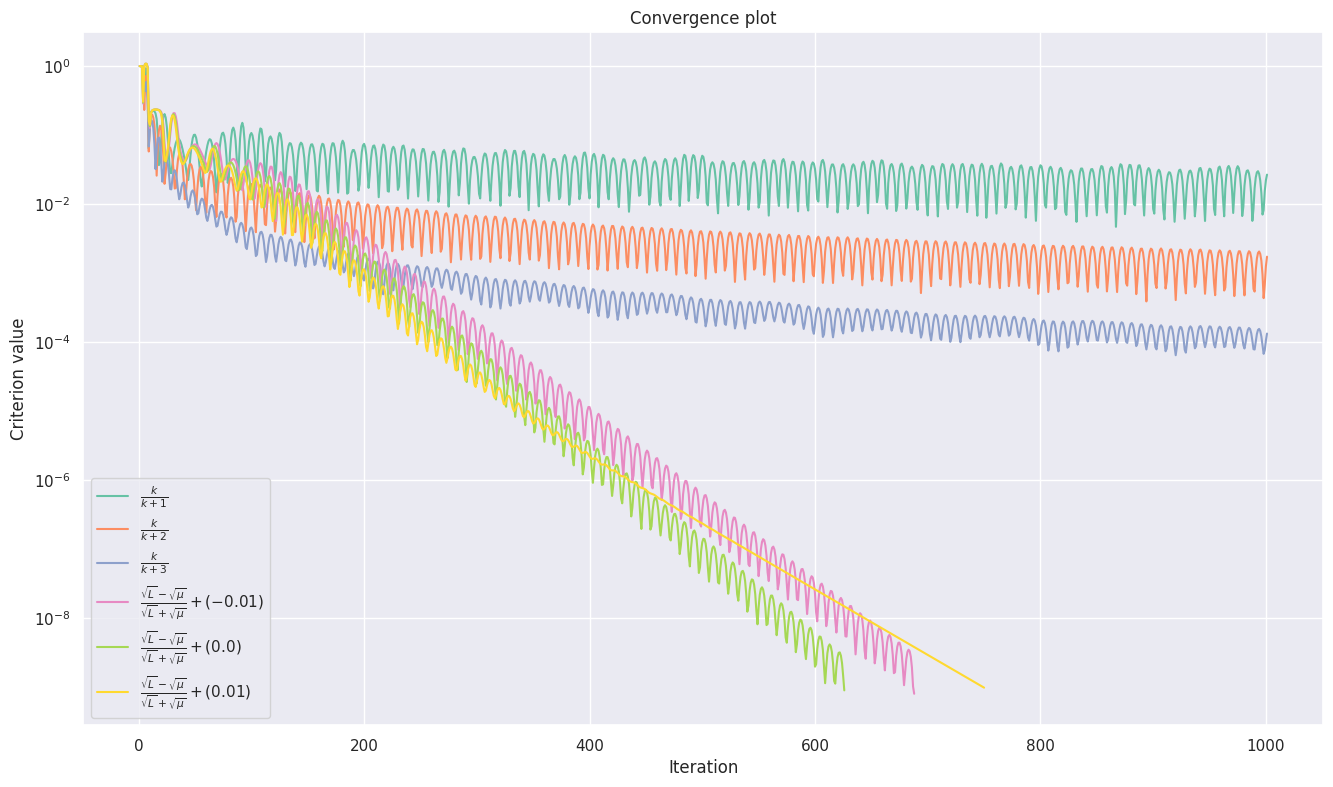

In [9]:
fig, axs = make_plot(xlabex="Iteration", ylabel="Criterion value", title="Convergence plot")
axs.set_yscale("log")

for error, label in errorsHeavy:
    sns.lineplot(x=np.arange(1, len(error) + 1), y=error, label=label, ax=axs)

Из графика видно, что наибольшая скорость сходимости при моментуме $\frac{\sqrt{L} - \sqrt{\mu}}{\sqrt{L} + \sqrt{\mu}}$ и нулевом сдвиге

__в). (0.5 балла)__ Постройте график сходимости на тестовой выборке от числа итераций.

- Используйте шаг $\frac{1}{L}$
- Значения моментума — лучшее из предыдущего пункта
- Стартовая точка $x^0$ — случайная, одинаковая для всего задания
- Критерий $\frac{\| \nabla f(x^k) \|}{\| \nabla f(x^0) \|}$



По оси абцисс — номер итерации, по оси ординат — логарифм значения критерия на этой итерации.

Добавьте на этот же график сходимость градиентного спуска с шагом $\frac{1}{L}$, укажите обе сходимости в легенде.

_Следите за оформлением графиков: размер графика, масштаб осей (обычный или логарифмический), подписи осей (в том числе размер), легенда (если на графике не одна линия), толщина линий и т.д. Графики должны быть удобны для чтения._



In [10]:
def GradientDescent(grad, criterion, x_0, eps, max_iter, **params):
    """
   :param grad: функция, которая считает градиент целевой функции;
   :param criterion: функция, вычисляющая критерий;
   :param x_0: начальная точка;
   :param eps: точность сходимости (обычно 1e-8);
   :param max_iter: количество итераций;
   **params - содержит именованные гиперпараметры метода:
       params['gamma'](k) - шаг, зависящий от номера итерации.
    """

    errors = []

    x_k = np.copy(x_0)
    err_x_0 = criterion(x_k)
    errors.append(criterion(x_k) / err_x_0)
    for k in trange(max_iter):
        x_k -= params["gamma"](k) * grad(x_k)[1]

        errors.append(criterion(x_k) / err_x_0)
        if errors[-1] < eps:
            break

    return x_k, errors

In [11]:
errorHeavy = HeavyBall(grad_test, criterion_test, x_0_test, EPS, MAX_ITER, gamma=gamma, tau=momentums[4][0])[1]
errorDescn = GradientDescent(grad_test, criterion_test, x_0_test, EPS, MAX_ITER, gamma=gamma, tau=momentums[4][0])[1]

100%|██████████| 1000/1000 [00:00<00:00, 5823.93it/s]


<Axes: title={'center': 'Convergence plot'}, xlabel='Iteration', ylabel='Criterion value'>

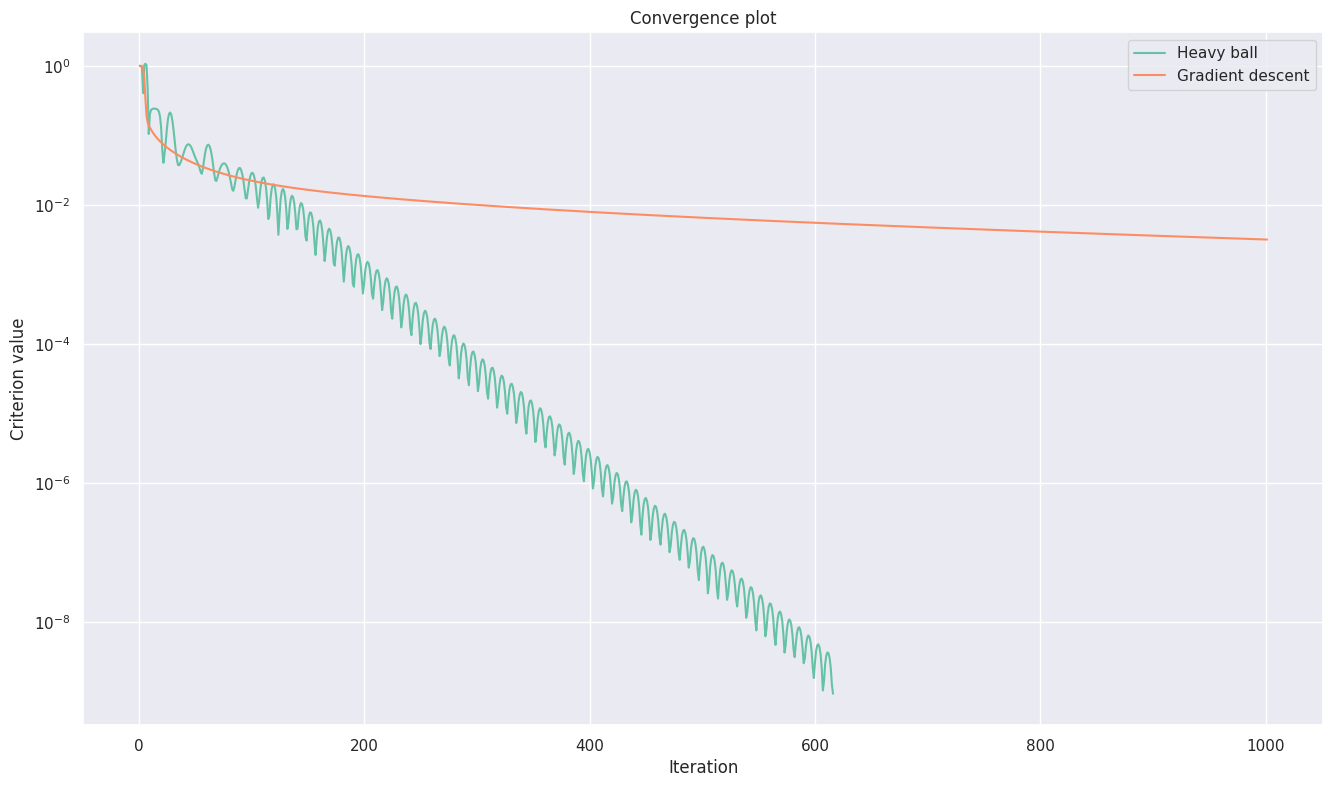

In [12]:
fig, axs = make_plot(xlabex="Iteration", ylabel="Criterion value", title="Convergence plot")
axs.set_yscale("log")

sns.lineplot(x=np.arange(1, len(errorHeavy) + 1), y=errorHeavy, label="Heavy ball", ax=axs)
sns.lineplot(x=np.arange(1, len(errorDescn) + 1), y=errorDescn, label="Gradient descent", ax=axs)

__г). (0.5 балла)__ Реализуйте ускоренный градиентный метод

**Псевдокод алгоритма**

_Инициализация:_

Величина шага $ \{ \gamma_k \}_{k=0} > 0 $, моментум $ \{ \tau_k \}_{k=0} \in [0; 1] $, стартовая точка $ x^0 = y^0 \in \mathbb{R}^d $, количество итераций $ K $

_$k$-ая итерация:_
1. Подсчитать направление спуска $$ \nabla f(y^k) $$
2. Сделать шаг алгоритма $$ x^{k+1} = y^k - \gamma_k \nabla f(y^k) $$
3. Вычислить новую точку для подсчета градиента на следующем шаге $$ y^{k+1} = x^{k+1} + \tau_k (x^{k+1} - x^k) $$

Используйте предложенную функцию для реализации алгоритма и допишите недостающие фрагменты. После чего для проверки правильности загрузите функцию в [контест](https://contest.yandex.ru/contest/66540/enter/)

In [13]:
import numpy as np
from tqdm import trange


def NAG(grad, criterion, x_0, eps, max_iter, **params):
    """
       grad(x) - функция, которая считает градиент целевой функции;
       criterion(x) - функция, считающая критерий;
       x_0 - начальная точка;
       eps - точность сходимости (обычно 1e-8);
       max_iter - количество итераций;
       **params - содержит именнованные гиперпараметры метода:
           params['gamma'](k) - шаг, зависящий от номера итерации,
           params['tau'](k) - моментум, зависящий от номера итерации.
    """
    errors = []

    x_k = np.copy(x_0)
    y_k = np.copy(x_0)
    err_x_0 = criterion(x_k)
    errors.append(criterion(x_k) / err_x_0)

    for k in trange(max_iter):
        x_k_next = y_k - params["gamma"](k) * grad(y_k)[1]
        y_k_next = x_k_next + params["tau"](k) * (x_k_next - x_k)
        x_k, y_k = x_k_next, y_k_next

        errors.append(criterion(x_k) / err_x_0)
        if errors[-1] < eps:
            break
    return x_k, errors

__д). (1.5 балла)__ Решите задачу логистической регрессии с помощью ускоренного градиентного метода на обучающей выборке.

- Используйте шаг $\frac{1}{L}$
- Рассмотрите моментум `tau_0` = $\frac{\sqrt{L} - \sqrt{\mu}}{\sqrt{L} + \sqrt{\mu}}$ и несколько моментумов в его окрестности
- Рассмотрите моментумы равные  $\frac{k}{k+3}$, $\frac{k}{k+2}$, $\frac{k}{k+1}$ ($k$ — номер итерации),
- Стартовая точка $x^0$ — случайная, одинаковая для всего задания
- Критерий $\frac{\| \nabla f(x^k) \|}{\| \nabla f(x^0) \|}$

Постройте график сходимости метода на тренировочной выборке от числа итераций для различных значений моментума.

По оси абцисс — номер итерации, по оси ординат — логарифм значения критерия на этой итерации.

Разместите данные для различных моментумов на одном графике, укажите их в легенде, при этом для моментумов, полученных по формулам, обязательно в легенде указывать именно формулу, а для $\frac{\sqrt{L} - \sqrt{\mu}}{\sqrt{L} + \sqrt{\mu}}$ дополнительно укажите в скобках значение.

_Следите за оформлением графиков: размер графика, масштаб осей (обычный или логарифмический), подписи осей (в том числе размер), легенда (если на графике не одна линия), толщина линий и т.д. Графики должны быть удобны для чтения._

In [21]:
errorsNAG = [(NAG(grad_train, criterion_train, x_0_train, EPS, MAX_ITER, gamma=gamma, tau=momentum)[1], label)
             for momentum, label in momentums]

 77%|███████▋  | 772/1000 [00:00<00:00, 1237.60it/s]


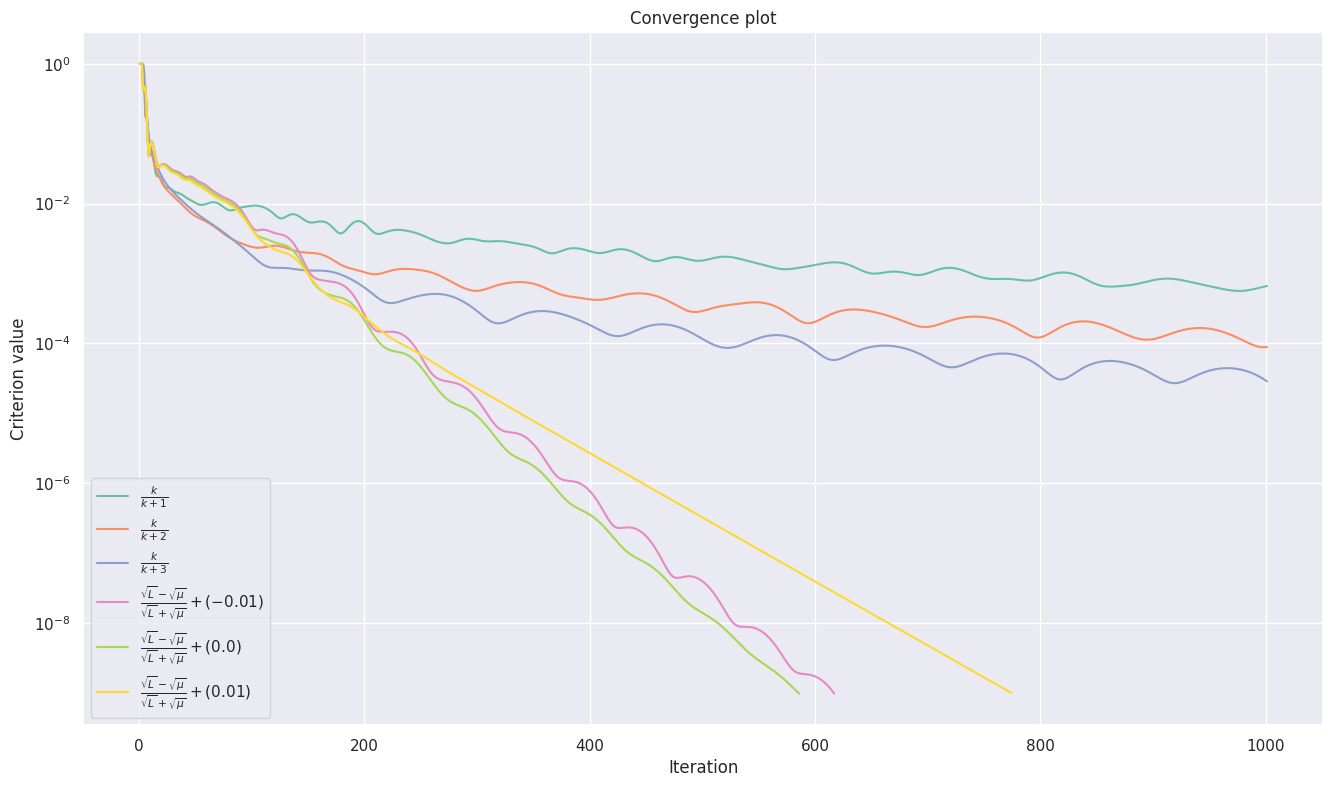

In [15]:
fig, axs = make_plot(xlabex="Iteration", ylabel="Criterion value", title="Convergence plot")
axs.set_yscale("log")
for error, label in errorsNAG:
    sns.lineplot(x=np.arange(1, len(error) + 1), y=error, label=label, ax=axs)

И снова мы получили, что наибольшая скорость сходимости при моментуме $\frac{\sqrt{L} - \sqrt{\mu}}{\sqrt{L} + \sqrt{\mu}}$ и нулевом сдвиге

__е). (1.5 балла)__ Постройте график сходимости на тестовой выборке от числа итераций.

- Используйте шаг $\frac{1}{L}$
- Значения моментума — лучшее из предыдущего пункта
- Стартовая точка $x^0$ — случайная, одинаковая для всего задания
- Критерий $\frac{\| \nabla f(x^k) \|}{\| \nabla f(x^0) \|}$


По оси абцисс — номер итерации, по оси ординат — логарифм значения критерия на этой итерации.

Добавьте на этот же график сходимости из пункта в), укажите все три сходимости в легенде.

_Следите за оформлением графиков: размер графика, масштаб осей (обычный или логарифмический), подписи осей (в том числе размер), легенда (если на графике не одна линия), толщина линий и т.д. Графики должны быть удобны для чтения._



In [22]:
errorNAG = NAG(grad_test, criterion_test, x_0_test, EPS, MAX_ITER, gamma=gamma, tau=momentums[4][0])[1]

 58%|█████▊    | 582/1000 [00:00<00:00, 4516.03it/s]


<Axes: title={'center': 'Convergence plot'}, xlabel='Iteration', ylabel='Criterion value'>

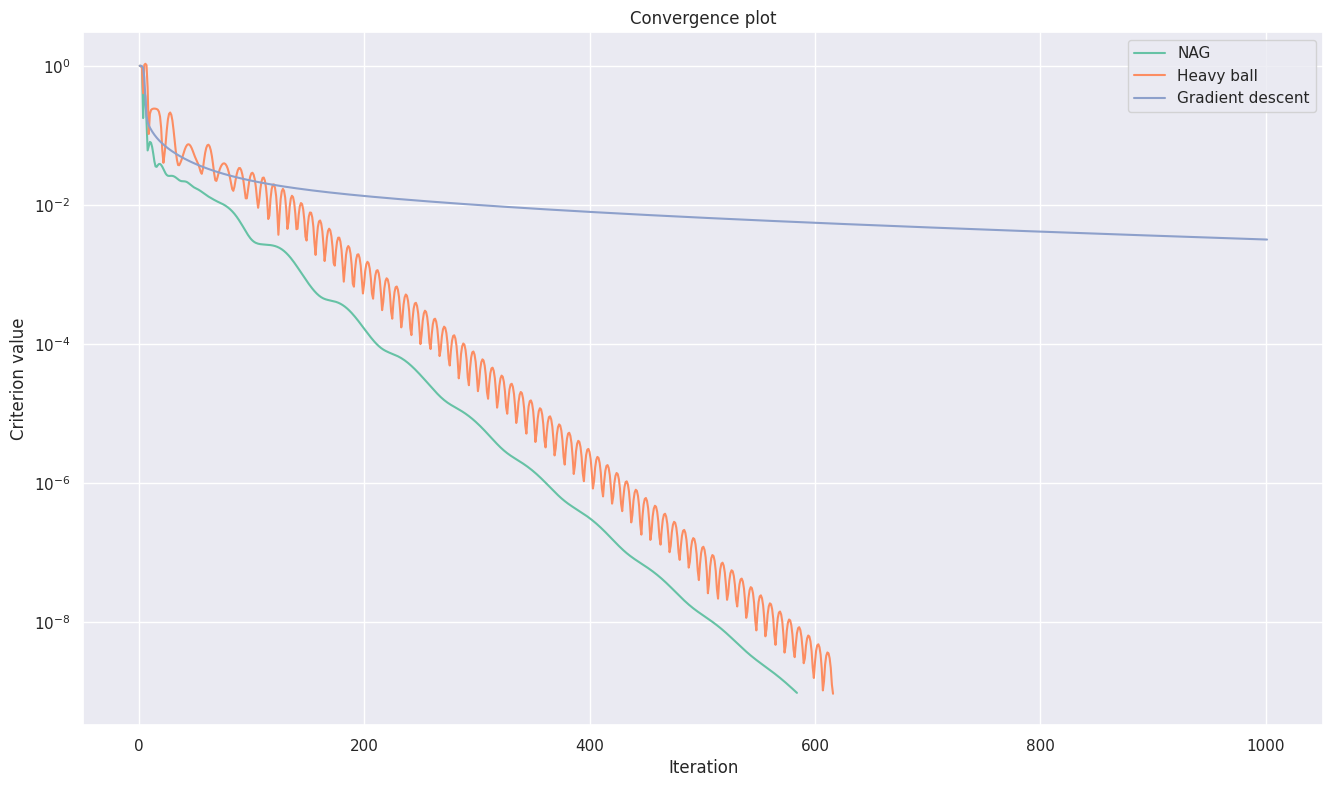

In [17]:
fig, axs = make_plot(xlabex="Iteration", ylabel="Criterion value", title="Convergence plot")
axs.set_yscale("log")

sns.lineplot(x=np.arange(1, len(errorNAG) + 1), y=errorNAG, label="NAG", ax=axs)
sns.lineplot(x=np.arange(1, len(errorHeavy) + 1), y=errorHeavy, label="Heavy ball", ax=axs)
sns.lineplot(x=np.arange(1, len(errorDescn) + 1), y=errorDescn, label="Gradient descent", ax=axs)

Метод Нестерова оказался наилучшим, хотя метод тяжелого шаника не сильно от него отстает. Стандартный градиентный спуск существенно медленнее

# Дополнительная часть

__Задача 1. (всего 4 балла)__

__а). (1 балл)__ Вспомним, что исходная задача регрессии является задачой машинного обучения и с помощью линейной модели $x^T a$ можно предсказывать значения меток $b$. Как использовать итоговую модель для предсказания?


__Ваше решение__
Любая из моделей нам возвращает $x$. Это вектор оптимальных значений параметров для минимизации $f$. Перед нами стоит задача классификации, и $f$ как раз и создана для минимизации ошибки, получаемых предсказаний из сигмоиды $p(x)$. Значит, прогнав $x^Ta_i$ через сигмоиду, мы получим вероятность того, что объект i принадлежит к какому-то классу. Посмотрев в файл с данными, можно обнаружить, что классификация бинарная, следовательно, установив пороговое значение вероятности, мы сможем относить объект к классу 0 или 1 соответственно. Буду использовать метод Нестерова с нулевым сдвигом так как он сработал лучше всего.

__б). (0.5 балла)__ Ответив на вопрос, напишите функцию, которая делает предсказания на тестовой выборке $A_{test}$. Сравните с реальными метками $b_{test}$. Количество правильно угаданных меток есть точность/accuracy модели.

In [18]:
class Model:
    def __init__(self, method, grad, criterion, x_0, eps, max_iter, **params):
        self.method = method
        self.grad = grad
        self.criterion = criterion
        self.x_0 = x_0
        self.eps = eps
        self.max_iter = max_iter
        self.params = params
        self.x = None

    def fit(self):
        self.x = self.method(self.grad, self.criterion, self.x_0, self.eps, self.max_iter, gamma=self.params['gamma'],
                             tau=self.params['tau'])

    def predict(self, a):
        return scipy.special.expit(self.x[0].T @ a) > 0.5


In [19]:
modelNAG = Model(NAG, grad_train, criterion_train, x_0_train, EPS, MAX_ITER, gamma=gamma, tau=momentums[4][0])
modelNAG.fit()

accuracy = 0
for i in range(len(A_test)):
    accuracy += modelNAG.predict(A_test[i]) == b_test[i]

print(f"Correct {accuracy} out of {len(A_test)}")

 58%|█████▊    | 584/1000 [00:00<00:00, 1018.79it/s]

Correct 1619 out of 1625


__в). (2.5 балла)__ Сравните метод градиентного спуска, метод тяжелого шарика, ускоренный градиентный метод. Постройте два графика: значение критерия сходимости от номера итерации и точность предсказания от номера итерации.

In [20]:
modelHeavy = Model(HeavyBall, grad, criterion_train, x_0_train, EPS, MAX_ITER, gamma=gamma, tau=momentums[4][0])
modelDescn = Model(GradientDescent, grad, criterion_train, x_0_train, EPS, MAX_ITER, gamma=gamma, tau=momentums[4][0])

modelHeavy.fit()
modelDescn.fit()

NameError: name 'grad' is not defined

In [49]:
# Ваше решение (график)

__Задача 2. (всего 6 баллов)__ Универсальное ускорение (на основании [статьи](https://arxiv.org/pdf/1506.02186))


Catalyst (катализатор) — это универсальная техника, которая придумана, чтобы ускорять любые методы, в частности, самый простой вариант, например, ускорить градиентный спуск, но, по факту, может быть подставлен абсолютно любой метод. Суть этого задания — проверить, какой способ ускорения градиентного спуска лучше: универсальный Catalyst или заточенные конкретно под градиентный спуск техники (ускоренный градиентный спуск Нестерова и метод тяжелого шарика).

__a). (1 балл)__ Реализуйте схему ускорения Catalyst для градиентного спуска.

Основная идея заключается в том, что мы добавляем к целевой функции слагаемое вида $\frac{\kappa}{2} \| x - y_{k-1} \|^2$, где $\kappa$ — гиперпараметр, о котором мы поговорим поздее, а $y_k$ — экстраполяция решения "по инерции", как мы делали в методах основной части этого задания. Скорость сходимости градиентого спуска, как известно, зависит от, так называемой, обусловленности задачи, а именно $\frac{L}{\mu}$. Нетрудно убедиться, (если коротко, поправка к гессиану будет вида $\kappa I$, из-за чего все его собственные значения увеличатся на $\kappa$) что у новой целевой функции число обусловленности будет равно  $\frac{L + \kappa}{\mu + \kappa}$. Чем ближе это число к единице, тем быстрее сходимость. Очевидно, положительный параметр $\kappa$ увеличивает число обусловленности, и вот, поэтому, теоретическая сходимость становится лучше. С другой стороны, для не сильно выпуклых задач, то есть $\mu = 0$, параметр $\kappa$ выступает, в каком-то смысле, в роле регуляризатора, и делает задачу сильно выпуклой.

Теперь запишем эту схему для произвольного алгоритма $A$.

**Псевдокод алгоритма**

_Инициализация:_

Начальное приближение $ x_0 \in \mathbb{R}^p $, параметры $ \kappa $ и $ \alpha_0 $, последовательность $ \{ \varepsilon_k \}_{k \geq 0} $, метод оптимизации — $A$.

Также необходимо задать следующим образом некоторые из параметров: $$ q = \frac{\mu}{\mu + \kappa}, \quad y_0 = x_0 $$

_$k$-ая итерация:_
   1. Найти приближённое решение следующей задачи с использованием метода $A$:
   $$
   x_k \approx \arg \min_{x \in \mathbb{R}^p} \left\{ G_k(x) = F(x) + \frac{\kappa}{2} \| x - y_{k-1} \|^2 \right\},
   \quad \text{т. ч.} \quad
   G_k(x_k) - G^*_k \leq \varepsilon_k.
   $$
   2. Вычислить $ \alpha_k \in (0, 1) $ из уравнения:
   $$
   \alpha_k^2 = (1 - \alpha_k) \alpha_{k-1}^2 + q \alpha_k .
   $$
   3. Вычислить:
   $$
   y_k = x_k + \beta_k (x_k - x_{k-1}),
   \quad \text{где} \quad
   \beta_k = \frac{\alpha_{k-1} (1 - \alpha_{k-1})}{\alpha_{k-1}^2 + \alpha_k}.
   $$


Теперь давайте ускорим с помощью этой схемы градиентный спуск, то есть возьмём его в качестве алгоритма $A$.

Используйте предложенную функцию для реализации алгоритма и допишите недостающие фрагменты.

In [50]:
import numpy as np
from tqdm import tqdm


def catalyst_method(method_A, grad, criterion, x_0, eps, max_iter, **params):
    '''
    grad(x) - функция, которая считает градиент целевой функции;
    criterion(x) - функция, которая считает критерий;
    x_0 - начальная точка;
    eps - точность сходимости;
    max_iter - количество итераций;
    method_A - оптимизационный метод (например, градиентный спуск);
    **params - гиперпараметры метода:
        params['kappa'] - параметр регуляризации,
        params['alpha_0'] - начальное значение альфа,
        params['mu'] - сильно выпуклый параметр задачи,
        params['epsilon_k'] - последовательность точностей для задачи.
    '''

    errors = []

    x_k = np.copy(x_0)
    y_k = np.copy(x_0)
    alpha_k = params['alpha_0']
    q = params['mu'] / (params['mu'] + params['kappa'])
    beta_k = 0
    x_prev = np.copy(x_0)

    # Ваше решение

    return x_k, errors


def catalyst(method_A, kappa, alpha_0, mu, epsilon_k):
    def new_method(grad, criterion, x_0, eps, max_iter, **params):
        return catalyst_method(
            method_A,
            grad,
            criterion,
            x_0,
            eps,
            max_iter,
            kappa=kappa,
            alpha_0=alpha_0,
            mu=mu,
            epsilon_k=epsilon_k,
            **params
        )

    return new_method

__Как выбирать константы по теории__

В статье утверждается, что для сходимости алгоритма при сильно выпуклой функции нужно выбрать $ \alpha_0 = \sqrt{q} $, где $ q = \mu / (\mu + \kappa) $.


Для последовательности $ \varepsilon_k $ рекомендуется использовать:
   \begin{equation}
   \varepsilon_k = \frac{2}{9}( F(x_0) - F^* )(1 - \rho)^k
   \end{equation}
  Однако  разница $ F(x_0) - F^* $ изначально неизвестна. Если функция $ F $ неотрицательна, можно заменить $F^*$ на 0. Параметр $ \rho $ рекомендуется $ \rho < \sqrt{q} $. Здесь есть свобода выбора $\rho $, на практике часто берут $ \rho = 0.9 \sqrt{q} $.

Выбор $ \alpha_0 = \sqrt{q} $ сделан для упрощения анализа, но в некоторых случаях могут быть использованы большие значения $ \alpha_0 $. Из некоторых соображений, можно выбирать $ \alpha_0 $ так, чтобы выполнялось уравнение $ \alpha_0^2 + (1 - q)\alpha_0 - 1 = 0 $.






__б). (2 балла)__ Решите задачу логистической регрессии с помощью метода Catalyst на обучающей выборке.

- Используйте шаг $ \frac{1}{L} $
- Зафиксируйте $\rho$, $\alpha$
- Рассмотрите 5 различных значений параметра $ \kappa $
- Стартовая точка $x_0$ — точка, у которой все координаты 0
- Критерий $ \frac{\| \nabla f(x^k) \|}{\| \nabla f(x^0) \|} $

Постройте график сходимости метода на тренировочной выборке от числа итераций для различных значений параметра $ \kappa $.

По оси абсцисс — номер итерации, по оси ординат — логарифм значения критерия на этой итерации.

Разместите данные для различных $ \kappa $ на одном графике, укажите их в легенде.

_Следите за оформлением графиков: размер графика, масштаб осей (обычный или логарифмический), подписи осей (в том числе размер), легенда (если на графике не одна линия), толщина линий и т.д._


In [51]:
# Ваше решение

In [52]:
# Ваше решение (график)

In [53]:
# Ваше решение (лучшее значение параметра)


__в). (1 балл)__ Постройте график сходимости на тестовой выборке от числа итераций.

- Используйте шаг $ \frac{1}{L} $
- Использованные ранее $\rho$, $\alpha$
- Значение $ \kappa $ — лучшее из предыдущего пункта
- Стартовая точка — случайная, одинаковая для всего задания
- Критерий $ \frac{\| \nabla f(x^k) \|}{\| \nabla f(x^0) \|} $

По оси абцисс — номер итерации, по оси ординат — логарифм значения критерия на этой итерации.

Добавьте на этот же график сходимости из пункта е) задачи 2, укажите все четыре сходимости в легенде.

_Следите за оформлением графиков: размер графика, масштаб осей (обычный или логарифмический), подписи осей (в том числе размер), легенда (если на графике не одна линия), толщина линий и т.д. Графики должны быть удобны для чтения._


In [54]:
# Ваше решение (график)

__г). (2 балла)__ Суперпозиция схем.

Проверьте, а что будет, если в качестве $A$ в схеме Catalyst использовать уже ускоренный с помощью данной схемы градиентный спуск. По сути, суперпозиция двух ускорений с помощью схемы Catalyst.

Постройте график зависимости точности модели на тестовой выборке от числа итераций.

- Используйте шаг $ \frac{1}{L} $
- Использованные ранее $\rho$, $\alpha$, лучшее $ \kappa $
- Стартовая точка — случайная, одинаковая для всего задания
- Критерий $ \frac{\| \nabla f(x^k) \|}{\| \nabla f(x^0) \|} $

По оси абцисс — номер итерации, по оси ординат — логарифм значения критерия на этой итерации.

Добавьте на этот же график сходимость градиентного спуска и сходимость один раз ускоренного с помощью Catalyst.

_Следите за оформлением графиков: размер графика, масштаб осей (обычный или логарифмический), подписи осей (в том числе размер), легенда (если на графике не одна линия), толщина линий и т.д. Графики должны быть удобны для чтения._

In [55]:
# Ваше решение

In [56]:
# Ваше решение (график)